# EDA on TIPS dataset

In [4]:
import seaborn as sns
df=sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [27]:
me=df["total_bill"].mean()
me

19.785942622950824

In [31]:
md=df["total_bill"].median()
md

17.795

In [30]:
mo=df["total_bill"].mode()
mo

0    13.42
dtype: float64

In [37]:
v=[]
v.append(me)
v.append(md)
v.append(mo)
v

[19.785942622950824,
 17.795,
 0    13.42
 dtype: float64]

/Users/ananthb/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


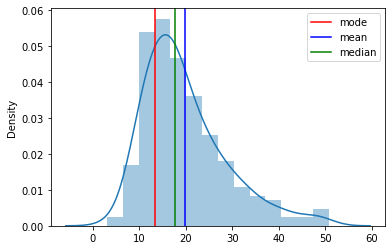

In [60]:
import matplotlib.pyplot as plt
sns.distplot(x=df["total_bill"])
plt.axvline(mo[0],color="red",label="mode")
plt.axvline(me,color="blue",label="mean")
plt.axvline(md,color="green",label="median")
plt.legend()
plt.show()

In [63]:
df["total_bill"].quantile()

17.795

In [65]:
q1=np.percentile(df["total_bill"],25)
q1


13.3475

In [66]:
q3=np.percentile(df["total_bill"],75)
q3

24.127499999999998

In [71]:
q2=np.percentile(df["total_bill"],50)
q2

17.795

In [68]:
iqr=q3-q1
iqr

10.779999999999998

In [70]:
ran=df["total_bill"].max()-df["total_bill"].min()
ran

47.74

/Users/ananthb/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


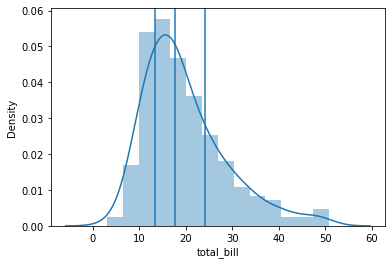

In [75]:
sns.distplot(df["total_bill"])
plt.axvline(q1)
plt.axvline(q2)
plt.axvline(q3)
plt.show()

In [82]:
print(df["total_bill"].skew())
print(df["total_bill"].mean())
df["total_bill"].median()

1.1332130376158205
19.785942622950824


17.795

In [78]:
df["total_bill"].kurt()

1.2184840156638854

/Users/ananthb/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

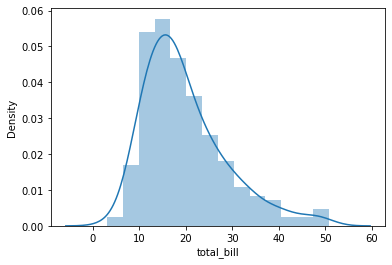

In [79]:
sns.distplot(df["total_bill"])

In [96]:

def s(sd):
    for i in t.sex:
        if i=="Male":
            i=1
        else:
            i=0
t["sex"].apply(s)

0      None
1      None
2      None
3      None
4      None
       ... 
239    None
240    None
241    None
242    None
243    None
Name: sex, Length: 244, dtype: object

In [99]:
t["sex le1"]=t["sex"].map({"Male":1,"Female":0})
t

,total_bill,tip,sex,smoker,day,time,size,sex le1
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


In [100]:
from sklearn.preprocessing import LabelEncoder

In [104]:
le=LabelEncoder()

In [106]:
t["sexl3"]=le.fit_transform(t["sex"])
t

,total_bill,tip,sex,smoker,day,time,size,sex le1,sexl3
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1,1


In [108]:
import pandas as pd
pd.get_dummies(t["sex"])

,Male,Female
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
239,1,0
240,0,1
241,1,0
242,1,0


In [109]:
pd.get_dummies(t["sex"],drop_first=True)

,Female
0,1
1,0
2,0
3,0
4,1
...,...
239,0
240,1
241,0
242,0


In [110]:
pd.get_dummies(data=t,columns=["sex","day","time"]).head()

,total_bill,tip,smoker,size,sex le1,sexl3,sex_Male,sex_Female,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,No,2,0,0,0,1,0,0,0,1,0,1
1,10.34,1.66,No,3,1,1,1,0,0,0,0,1,0,1
2,21.01,3.50,No,3,1,1,1,0,0,0,0,1,0,1
3,23.68,3.31,No,2,1,1,1,0,0,0,0,1,0,1
4,24.59,3.61,No,4,0,0,0,1,0,0,0,1,0,1


In [111]:
pd.get_dummies(data=t,columns=["sex","day","time"],drop_first=True).head()

,total_bill,tip,smoker,size,sex le1,sexl3,sex_Female,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,No,2,0,0,1,0,0,1,1
1,10.34,1.66,No,3,1,1,0,0,0,1,1
2,21.01,3.50,No,3,1,1,0,0,0,1,1
3,23.68,3.31,No,2,1,1,0,0,0,1,1
4,24.59,3.61,No,4,0,0,1,0,0,1,1


In [112]:
t

,total_bill,tip,sex,smoker,day,time,size,sex le1,sexl3
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1,1


In [114]:
t

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [117]:
d=t["day"].value_counts(normalize=True)*100

In [118]:
d

Sat     35.655738
Sun     31.147541
Thur    25.409836
Fri      7.786885
Name: day, dtype: float64

In [120]:
t["fe"]=t["day"].map(d)

In [121]:
t

,total_bill,tip,sex,smoker,day,time,size,fe
0,16.99,1.01,Female,No,Sun,Dinner,2,31.147541
1,10.34,1.66,Male,No,Sun,Dinner,3,31.147541
2,21.01,3.50,Male,No,Sun,Dinner,3,31.147541
3,23.68,3.31,Male,No,Sun,Dinner,2,31.147541
4,24.59,3.61,Female,No,Sun,Dinner,4,31.147541
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,35.655738
240,27.18,2.00,Female,Yes,Sat,Dinner,2,35.655738
241,22.67,2.00,Male,Yes,Sat,Dinner,2,35.655738
242,17.82,1.75,Male,No,Sat,Dinner,2,35.655738


In [136]:
t["zscore"]=(t["total_bill"]-t["total_bill"].mean())/t["total_bill"].std()

In [137]:
t

,total_bill,tip,sex,smoker,day,time,size,fe,zscore
0,16.99,1.01,Female,No,Sun,Dinner,2,31.147541,-0.314066
1,10.34,1.66,Male,No,Sun,Dinner,3,31.147541,-1.061054
2,21.01,3.50,Male,No,Sun,Dinner,3,31.147541,0.137497
3,23.68,3.31,Male,No,Sun,Dinner,2,31.147541,0.437416
4,24.59,3.61,Female,No,Sun,Dinner,4,31.147541,0.539635
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,35.655738,1.038377
240,27.18,2.00,Female,Yes,Sat,Dinner,2,35.655738,0.830568
241,22.67,2.00,Male,Yes,Sat,Dinner,2,35.655738,0.323964
242,17.82,1.75,Male,No,Sat,Dinner,2,35.655738,-0.220833


In [138]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [140]:
t["ztb"]=ss.fit_transform(t[["total_bill"]])

In [141]:
t

,total_bill,tip,sex,smoker,day,time,size,fe,zscore,ztb
0,16.99,1.01,Female,No,Sun,Dinner,2,31.147541,-0.314066,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,31.147541,-1.061054,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,31.147541,0.137497,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,31.147541,0.437416,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,31.147541,0.539635,0.540745
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,35.655738,1.038377,1.040511
240,27.18,2.00,Female,Yes,Sat,Dinner,2,35.655738,0.830568,0.832275
241,22.67,2.00,Male,Yes,Sat,Dinner,2,35.655738,0.323964,0.324630
242,17.82,1.75,Male,No,Sat,Dinner,2,35.655738,-0.220833,-0.221287


In [143]:
print("skew of org",t["total_bill"].skew())
print("skew of zscore",t["ztb"].skew())

skew of org 1.1332130376158205
skew of zscore 1.1332130376158205


In [144]:
print("skew of org",t["total_bill"].kurt())
print("skew of zscore",t["ztb"].kurt())

skew of org 1.2184840156638854
skew of zscore 1.2184840156638836


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

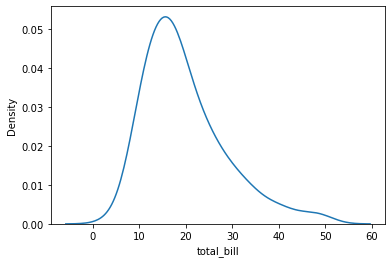

In [145]:
sns.kdeplot(t["total_bill"])


<AxesSubplot:xlabel='ztb', ylabel='Density'>

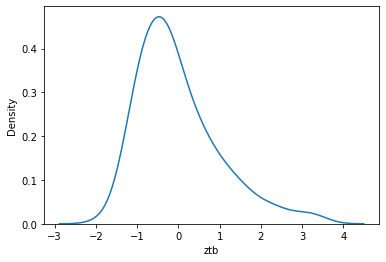

In [146]:
sns.kdeplot(t["ztb"])     #Scaling has changed

In [3]:
import pandas as pd
import seaborn as sns

In [6]:
df["mmtb"]=(df["total_bill"]-df["total_bill"].min())/(df["total_bill"].max()-df["total_bill"].min())

In [8]:
df.sort_values(by="mmtb",ascending=False)

,total_bill,tip,sex,smoker,day,time,size,mmtb
170,50.81,10.00,Male,Yes,Sat,Dinner,3,1.000000
212,48.33,9.00,Male,No,Sat,Dinner,4,0.948052
59,48.27,6.73,Male,No,Sat,Dinner,4,0.946795
156,48.17,5.00,Male,No,Sun,Dinner,6,0.944700
182,45.35,3.50,Male,Yes,Sun,Dinner,3,0.885630
...,...,...,...,...,...,...,...,...
149,7.51,2.00,Male,No,Thur,Lunch,2,0.093004
111,7.25,1.00,Female,No,Sat,Dinner,1,0.087558
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.087558
92,5.75,1.00,Female,Yes,Fri,Dinner,2,0.056137


In [18]:
print(df["mmtb"].skew())
df["total_bill"].skew()

1.1332130376158203


1.1332130376158205

In [19]:
print(df["mmtb"].kurt())
df["total_bill"].kurt()

1.2184840156638836


1.2184840156638854

In [16]:
df["mmtb"].median()

0.3084415584415584

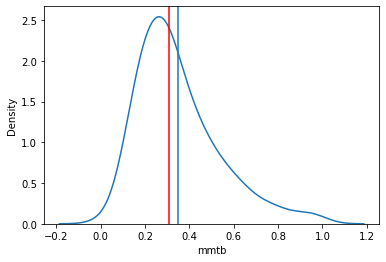

In [17]:
import matplotlib.pyplot as plt
sns.kdeplot(df["mmtb"])
plt.axvline(df["mmtb"].mean())
plt.axvline(df["mmtb"].median(),color="red")
plt.show()

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

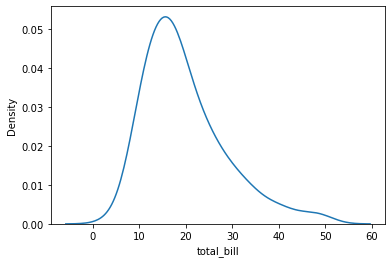

In [20]:
sns.kdeplot(df["total_bill"])

In [24]:
import numpy as np


In [26]:
df["sqt"]=np.sqrt(df["total_bill"])
df

,total_bill,tip,sex,smoker,day,time,size,mmtb,sqt
0,16.99,1.01,Female,No,Sun,Dinner,2,0.291579,4.121893
1,10.34,1.66,Male,No,Sun,Dinner,3,0.152283,3.215587
2,21.01,3.50,Male,No,Sun,Dinner,3,0.375786,4.583667
3,23.68,3.31,Male,No,Sun,Dinner,2,0.431713,4.866210
4,24.59,3.61,Female,No,Sun,Dinner,4,0.450775,4.958831
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.543779,5.387950
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.505027,5.213444
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.410557,4.761302
242,17.82,1.75,Male,No,Sat,Dinner,2,0.308965,4.221374


In [32]:

df

,total_bill,tip,sex,smoker,day,time,size,mmtb,sqt,logt
0,16.99,1.01,Female,No,Sun,Dinner,2,0.291579,4.121893,2.832625
1,10.34,1.66,Male,No,Sun,Dinner,3,0.152283,3.215587,2.336020
2,21.01,3.50,Male,No,Sun,Dinner,3,0.375786,4.583667,3.044999
3,23.68,3.31,Male,No,Sun,Dinner,2,0.431713,4.866210,3.164631
4,24.59,3.61,Female,No,Sun,Dinner,4,0.450775,4.958831,3.202340
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.543779,5.387950,3.368330
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.505027,5.213444,3.302481
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.410557,4.761302,3.121042
242,17.82,1.75,Male,No,Sat,Dinner,2,0.308965,4.221374,2.880321


In [28]:
print(df["total_bill"].skew())
print(df["sqt"].skew())
print(df["logt"].skew())

1.1332130376158205
0.5661281592596766
-0.11623079290253824


In [29]:
print(df["total_bill"].kurt())
print(df["sqt"].kurt())
print(df["logt"].kurt())

1.2184840156638854
0.19520953466627722
0.4734793671474513


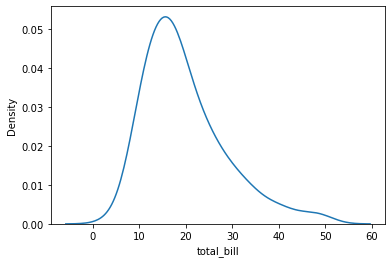

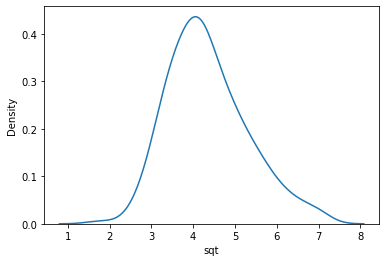

<AxesSubplot:xlabel='logt', ylabel='Density'>

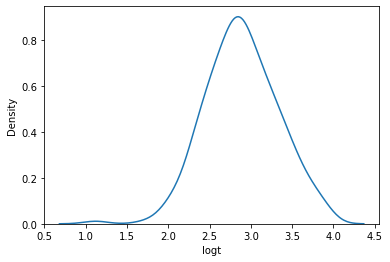

In [31]:
sns.kdeplot(df["total_bill"])
plt.show()
sns.kdeplot(df["sqt"])
plt.show()
sns.kdeplot(df["logt"])

In [35]:
df["ods"]=df["sqt"]**2
df["odl"]=np.exp(df["logt"])
df

,total_bill,tip,sex,smoker,day,time,size,mmtb,sqt,logt,ods,odl
0,16.99,1.01,Female,No,Sun,Dinner,2,0.291579,4.121893,2.832625,16.99,16.99
1,10.34,1.66,Male,No,Sun,Dinner,3,0.152283,3.215587,2.336020,10.34,10.34
2,21.01,3.50,Male,No,Sun,Dinner,3,0.375786,4.583667,3.044999,21.01,21.01
3,23.68,3.31,Male,No,Sun,Dinner,2,0.431713,4.866210,3.164631,23.68,23.68
4,24.59,3.61,Female,No,Sun,Dinner,4,0.450775,4.958831,3.202340,24.59,24.59
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.543779,5.387950,3.368330,29.03,29.03
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.505027,5.213444,3.302481,27.18,27.18
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.410557,4.761302,3.121042,22.67,22.67
242,17.82,1.75,Male,No,Sat,Dinner,2,0.308965,4.221374,2.880321,17.82,17.82


<AxesSubplot:xlabel='total_bill', ylabel='Count'>

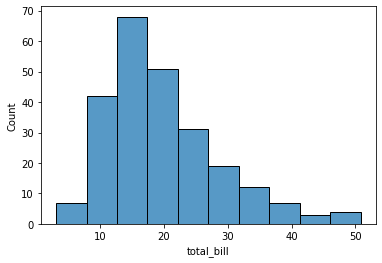

In [46]:
sns.histplot(df["total_bill"],bins=10)

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

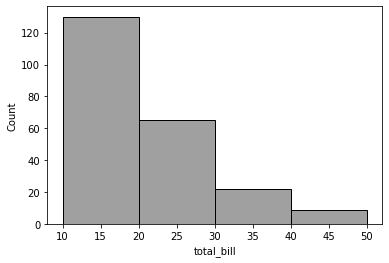

In [50]:
sns.histplot(df["total_bill"],bins=[10,20,30,40,50],color="grey")

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

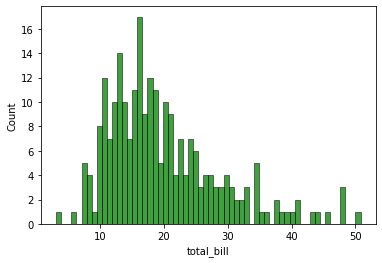

In [49]:
sns.histplot(df["total_bill"],bins=60,color="green",)

/Users/ananthb/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill'>

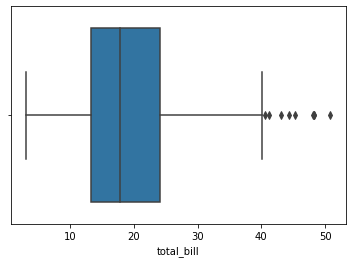

In [55]:
sns.boxplot(df["total_bill"])

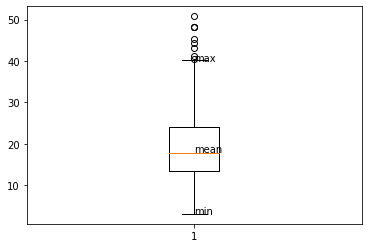

In [65]:
plt.boxplot(df["total_bill"])
plt.text(x=1,y=3,s="min")
plt.text(x=1,y=18,s="mean")
plt.text(x=1,y=40,s="max")
plt.show()

<AxesSubplot:>

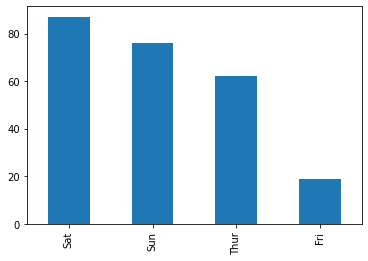

In [83]:
df["day"].value_counts().plot(kind="bar")

/Users/ananthb/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='count'>

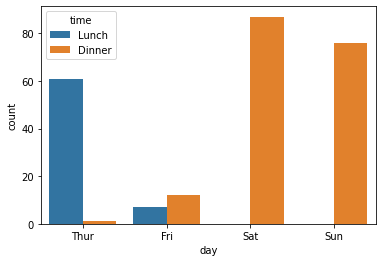

In [80]:
sns.countplot(df["day"],hue=df["time"])

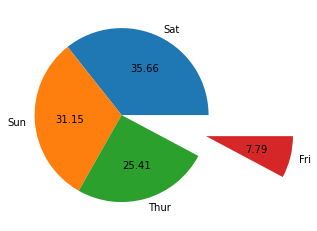

In [94]:
plt.pie(x=df["day"].value_counts(),labels=["Sat","Sun","Thur","Fri"],autopct="%.2f",explode=(0,0,0,1))
plt.show()

<AxesSubplot:ylabel='sex'>

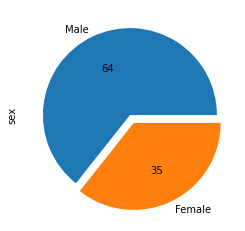

In [96]:
df["sex"].value_counts().plot(kind="pie",autopct="%li",explode=(0,0.1))

# bivariate Analysis


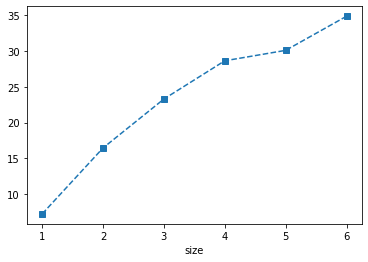

In [115]:
#line
df.groupby("size")["total_bill"].mean().plot(linestyle="--",marker="s")

plt.show()